# Contents
- Business Understanding
- Data Understanding
- Data Cleaning and Manipulation
- Data Visualization
- Data Preparation
- Data Modeling
- Cross Validations
- Identify the Overfitting issues
- Ridge Regression (Regularization Techniques)
- Lasso Regression (Regularization Techniques)
- Data Evaluation


# Business Understanding
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

# Business Objective
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Requirements
The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

# Data Understanding

In [1]:
#importing all the important libraries like numpy,pandas, matlplolib,seaborn,Statsmodels,Sklearn for various operations
#ignore warnings to keep notebook clean
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings   
warnings.filterwarnings("ignore")

# Since there are more columns to view , so using this options to view all the records of columns
pd.options.display.max_columns = 100

# The Below libraries are used to perform model evaluation techniques and prediction analysis 
# like Linear regression , Minmax scaling , r2-score, statsmodels , sklearn, VIF and RFE
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split             
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression                
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as ms

In [2]:
# Importing the Loan.csv file

Surprise_House_data = pd.read_csv('train.csv')

In [3]:
# To View the records of the dataset to check how it is looks like in python notebook.
# Also to ensure the csv file is read properly or not,
Surprise_House_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('No of empty Rows:')
print(Surprise_House_data.isnull().all(axis=1).sum())
print('Number of empty Columns:')
print(Surprise_House_data.isnull().all(axis=0).sum())
    
#There are no empty rows and columns in whole dataset.

No of empty Rows:
0
Number of empty Columns:
0


In [5]:
# this lines of code confirms that there is no duplicate in the dataset

print(Surprise_House_data.shape)
Surprise_House_data.drop_duplicates(inplace=True)
print(Surprise_House_data.shape)

(1460, 81)
(1460, 81)


In [6]:
# Checking all the column information and the datatypes of each column. 'All' is used to see all the columns.

Surprise_House_data.info("all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking the quantitative metrics for the quantitative columns
# Checking the mean, median,mode , quantiles of any levels
Surprise_House_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning and Manipulation

In [8]:
# To check the total no of records in the dataset

len(Surprise_House_data)


1460

In [9]:
# Checking the null values in the dataset

Surprise_House_data.isnull().sum()


# This states that there is few null values in the dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#replace NA values with None for 5 columns which is not actually a null value but it is a data value provided in the dataset.

for Columns_with_NA in ('Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'):
    Surprise_House_data[Columns_with_NA]=Surprise_House_data[Columns_with_NA].fillna('None')


In [11]:
# Checking the null values again in the dataset

Surprise_House_data.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
# Checking the quantitative metrics for the quantitative columns which has null values
# Checking the mean, median, quantiles of any levels

data_with_numericnull_columns = Surprise_House_data[['LotFrontage','MasVnrArea','GarageYrBlt']]
data_with_numericnull_columns.describe(percentiles = [.25,.5,.75,.95,.99])

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
95%,107.000000,456.000000,2007.000000
99%,141.000000,791.920000,2009.000000
max,313.000000,1600.000000,2010.000000


In [13]:
# Checking the Categorial metrics for the Columns having null values
# Checking the mode option here. 

print(Surprise_House_data.MasVnrType.value_counts())
print(Surprise_House_data.Electrical.value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [14]:
# Replacing the null values of each column by using median and mode.
# Median is used for numerical columns having null values ['LotFrontage','MasVnrArea','GarageYrBlt']
# Mode is used for categorical columns having null values ['Electrical','MasVnrType']

Surprise_House_data['LotFrontage']=Surprise_House_data['LotFrontage'].fillna(Surprise_House_data['LotFrontage'].median())
Surprise_House_data['MasVnrArea']=Surprise_House_data['MasVnrArea'].fillna(Surprise_House_data['MasVnrArea'].median())
Surprise_House_data['GarageYrBlt']=Surprise_House_data['GarageYrBlt'].fillna(Surprise_House_data['GarageYrBlt'].median())
Surprise_House_data['Electrical']=Surprise_House_data['Electrical'].fillna(Surprise_House_data['Electrical'].mode()[0])
Surprise_House_data['MasVnrType']=Surprise_House_data['MasVnrType'].fillna(Surprise_House_data['MasVnrType'].mode()[0])

In [15]:
# Checking the null values again in the dataset

Surprise_House_data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### Now all the null values are removed for all the columns

### Now Lets start with minimizing the unwanted columns for our analysis by dropping it from the dataset.

In [16]:
# Dropping ID Column since it is a unique values. So It wont help much in EDA.
Surprise_House_data = Surprise_House_data.drop(['Id'], axis=1)
Surprise_House_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [17]:
# Checking the columns which has high values to any particular unique value.
# Also they wont be suitable and provide proper prediction to the datasets.
# If it has then delte those columns which will not be useful for the datasets

Surprise_House_data.describe(exclude=np.number).transpose().sort_values(ascending = False,by = 'freq')

,count,unique,top,freq
Utilities,1460,2,AllPub,1459
Street,1460,2,Pave,1454
PoolQC,1460,4,None,1453
Condition2,1460,8,Norm,1445
RoofMatl,1460,8,CompShg,1434
Heating,1460,6,GasA,1428
MiscFeature,1460,5,None,1406
LandSlope,1460,3,Gtl,1382
Alley,1460,3,None,1369
CentralAir,1460,2,Y,1365


In [18]:
# PoolQC and PoolArea are more inter related and Most of the POOLQC have None as the values
# And Most of the POOLAREA has 0 as the values. 
# So these will not be useful for the future analysis in this datasets


print(Surprise_House_data.PoolQC.value_counts())
print(Surprise_House_data.PoolArea.value_counts())

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [19]:
# From the above code, these are the columns which has maximum values in a unique data which will not be useful
# So drop those columns from the datasets

Surprise_House_data.drop(['Utilities','Street','PoolQC','PoolArea','Condition2','RoofMatl','Heating','MiscFeature'], axis=1, inplace=True)

In [20]:
# Again now checking the Rows and columns of the given dataset

Surprise_House_data.shape

(1460, 72)

In [21]:
# Deriving the new column by merging 2 columns of year built and year remodelled.
# 0 - Not remodelled
# 1 - Remodelled

def CheckRemodelornot(df):     
    if(df['YearBuilt'] == df['YearRemodAdd']):
        return 0     
    else:
        return 1   
    
Surprise_House_data['RemodelledPropertyornot'] = Surprise_House_data.apply(CheckRemodelornot, axis=1)
# Since the new derived column is in int datatype , converting it to object dtype
Surprise_House_data['RemodelledPropertyornot'] = Surprise_House_data['RemodelledPropertyornot'].astype('object')


def PropertyAge(age):
        return age['YrSold'] - age['YearBuilt']
    
Surprise_House_data['PropertyAge'] = Surprise_House_data.apply(PropertyAge, axis=1)

# Checking the changes in the dataset
Surprise_House_data.head()   

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodelledPropertyornot,PropertyAge
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,None,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,None,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,None,0,9,2008,WD,Normal,223500,1,7
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,None,0,2,2006,WD,Abnorml,140000,1,91
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,None,0,12,2008,WD,Normal,250000,0,8


In [22]:
# Drop those columns which has been there before. we derived new columns from those columns 
# Since the 'GarageYrBlt' does not provide any valid predictions since it has more unique values. Dropping it as well.


Surprise_House_data = Surprise_House_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
Surprise_House_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,RemodelledPropertyornot,PropertyAge
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,None,0,2,WD,Normal,208500,0,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,None,0,5,WD,Normal,181500,0,31
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,None,0,9,WD,Normal,223500,1,7
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,None,0,2,WD,Abnorml,140000,1,91
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,None,0,12,WD,Normal,250000,0,8


In [23]:
# Again Checking all the column information and the datatypes of each column after removing certain columns.

Surprise_House_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               1460 non-null   int64  
 1   MSZoning                 1460 non-null   object 
 2   LotFrontage              1460 non-null   float64
 3   LotArea                  1460 non-null   int64  
 4   Alley                    1460 non-null   object 
 5   LotShape                 1460 non-null   object 
 6   LandContour              1460 non-null   object 
 7   LotConfig                1460 non-null   object 
 8   LandSlope                1460 non-null   object 
 9   Neighborhood             1460 non-null   object 
 10  Condition1               1460 non-null   object 
 11  BldgType                 1460 non-null   object 
 12  HouseStyle               1460 non-null   object 
 13  OverallQual              1460 non-null   int64  
 14  OverallCond             

### Converting the categorical columns to object dtype from other dtypes

In [24]:
# Converting all the categorical dtypes from int to object

Surprise_House_data['MSSubClass'] = Surprise_House_data['MSSubClass'].astype('object')
Surprise_House_data['MoSold'] = Surprise_House_data['MoSold'].astype('object')
Surprise_House_data['OverallQual'] = Surprise_House_data['OverallQual'].astype('object')
Surprise_House_data['OverallCond'] = Surprise_House_data['OverallCond'].astype('object')
Surprise_House_data['BsmtFullBath'] = Surprise_House_data['BsmtFullBath'].astype('object')
Surprise_House_data['BsmtHalfBath'] = Surprise_House_data['BsmtHalfBath'].astype('object')
Surprise_House_data['FullBath'] = Surprise_House_data['FullBath'].astype('object')
Surprise_House_data['HalfBath'] = Surprise_House_data['HalfBath'].astype('object')
Surprise_House_data['BedroomAbvGr'] = Surprise_House_data['BedroomAbvGr'].astype('object')
Surprise_House_data['KitchenAbvGr'] = Surprise_House_data['KitchenAbvGr'].astype('object')
Surprise_House_data['TotRmsAbvGrd'] = Surprise_House_data['TotRmsAbvGrd'].astype('object')
Surprise_House_data['Fireplaces'] = Surprise_House_data['Fireplaces'].astype('object')
Surprise_House_data['GarageCars'] = Surprise_House_data['GarageCars'].astype('object')

## Handling Outliers

In [25]:
# Checking outliers for the entire numerical columns

Surprise_House_data.describe(percentiles = [.25,.5,.75,.95,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,PropertyAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,180921.195890,36.547945
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,79442.502883,30.250152
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,326100.000000,91.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,700.000000,442567.010000,110.410000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,755000.000000,136.000000


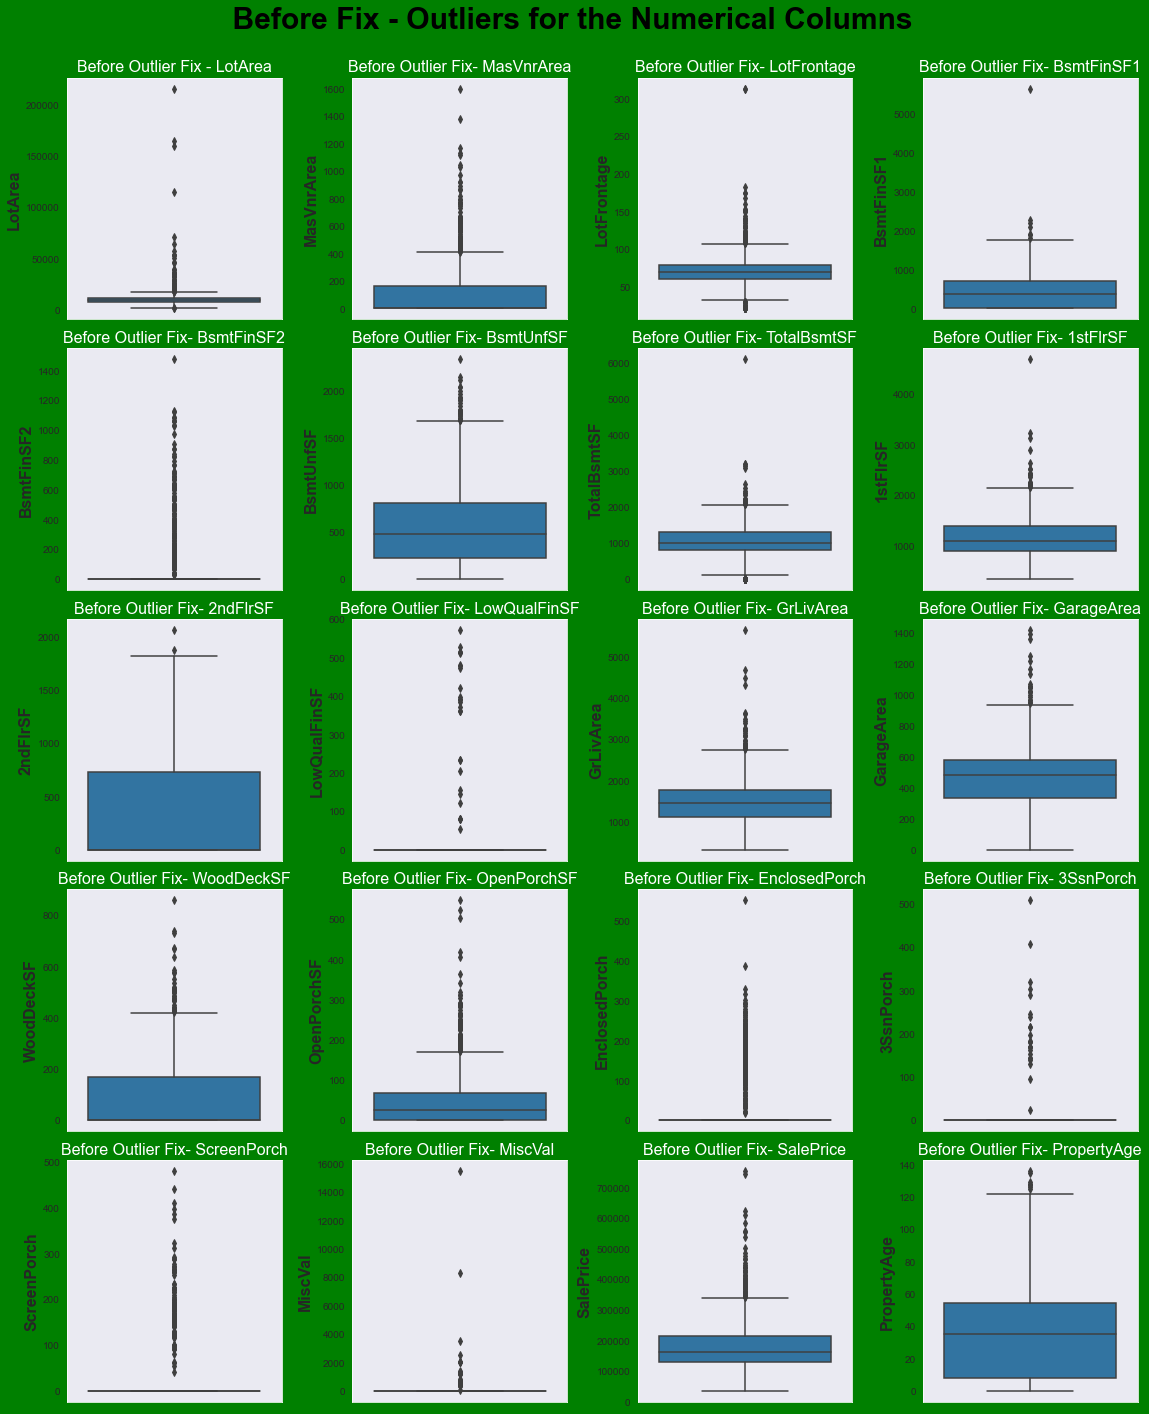

In [26]:
# Checking the outliers in box plot Before Treating it

plt.figure(figsize=(16,20),facecolor='g')
plt.suptitle(" Before Fix - Outliers for the Numerical Columns \n",fontweight ="bold",fontsize=30)
sns.set_style("dark")

# subplot 1
plt.subplot(5,4,1)
LA = sns.boxplot(y=Surprise_House_data['LotArea'])
LA.set_title('Before Outlier Fix - LotArea',fontsize=16,color='w')
LA.set_ylabel('LotArea',fontsize=16,fontweight ="bold")
# subplot 2
plt.subplot(5,4,2)
FA = sns.boxplot(y=Surprise_House_data['MasVnrArea'])
FA.set_title('Before Outlier Fix- MasVnrArea',fontsize=16,color='w')
FA.set_ylabel('MasVnrArea',fontsize=16,fontweight ="bold")
# subplot 3
plt.subplot(5,4,3)
FA_inv = sns.boxplot(y=Surprise_House_data['LotFrontage'])
FA_inv.set_title('Before Outlier Fix- LotFrontage',fontsize=16,color='w')
FA_inv.set_ylabel('LotFrontage',fontsize=16,fontweight ="bold")
# subplot 4
plt.subplot(5,4,4)
FA_inv = sns.boxplot(y=Surprise_House_data['BsmtFinSF1'])
FA_inv.set_title('Before Outlier Fix- BsmtFinSF1',fontsize=16,color='w')
FA_inv.set_ylabel('BsmtFinSF1',fontsize=16,fontweight ="bold")
# subplot 5
plt.subplot(5,4,5)
FA_inv = sns.boxplot(y=Surprise_House_data['BsmtFinSF2'])
FA_inv.set_title('Before Outlier Fix- BsmtFinSF2',fontsize=16,color='w')
FA_inv.set_ylabel('BsmtFinSF2',fontsize=16,fontweight ="bold")
# subplot 6
plt.subplot(5,4,6)
FA_inv = sns.boxplot(y=Surprise_House_data['BsmtUnfSF'])
FA_inv.set_title('Before Outlier Fix- BsmtUnfSF',fontsize=16,color='w')
FA_inv.set_ylabel('BsmtUnfSF',fontsize=16,fontweight ="bold")
# subplot 7
plt.subplot(5,4,7)
FA_inv = sns.boxplot(y=Surprise_House_data['TotalBsmtSF'])
FA_inv.set_title('Before Outlier Fix- TotalBsmtSF',fontsize=16,color='w')
FA_inv.set_ylabel('TotalBsmtSF',fontsize=16,fontweight ="bold")
# subplot 8
plt.subplot(5,4,8)
FA_inv = sns.boxplot(y=Surprise_House_data['1stFlrSF'])
FA_inv.set_title('Before Outlier Fix- 1stFlrSF',fontsize=16,color='w')
FA_inv.set_ylabel('1stFlrSF',fontsize=16,fontweight ="bold")
# subplot 9
plt.subplot(5,4,9)
FA_inv = sns.boxplot(y=Surprise_House_data['2ndFlrSF'])
FA_inv.set_title('Before Outlier Fix- 2ndFlrSF',fontsize=16,color='w')
FA_inv.set_ylabel('2ndFlrSF',fontsize=16,fontweight ="bold")
# subplot 10
plt.subplot(5,4,10)
FA_inv = sns.boxplot(y=Surprise_House_data['LowQualFinSF'])
FA_inv.set_title('Before Outlier Fix- LowQualFinSF',fontsize=16,color='w')
FA_inv.set_ylabel('LowQualFinSF',fontsize=16,fontweight ="bold")
# subplot 11
plt.subplot(5,4,11)
FA_inv = sns.boxplot(y=Surprise_House_data['GrLivArea'])
FA_inv.set_title('Before Outlier Fix- GrLivArea',fontsize=16,color='w')
FA_inv.set_ylabel('GrLivArea',fontsize=16,fontweight ="bold")
# subplot 12
plt.subplot(5,4,12)
FA_inv = sns.boxplot(y=Surprise_House_data['GarageArea'])
FA_inv.set_title('Before Outlier Fix- GarageArea',fontsize=16,color='w')
FA_inv.set_ylabel('GarageArea',fontsize=16,fontweight ="bold")
# subplot 13
plt.subplot(5,4,13)
FA_inv = sns.boxplot(y=Surprise_House_data['WoodDeckSF'])
FA_inv.set_title('Before Outlier Fix- WoodDeckSF',fontsize=16,color='w')
FA_inv.set_ylabel('WoodDeckSF',fontsize=16,fontweight ="bold")
# subplot 14
plt.subplot(5,4,14)
FA_inv = sns.boxplot(y=Surprise_House_data['OpenPorchSF'])
FA_inv.set_title('Before Outlier Fix- OpenPorchSF',fontsize=16,color='w')
FA_inv.set_ylabel('OpenPorchSF',fontsize=16,fontweight ="bold")
# subplot 15
plt.subplot(5,4,15)
FA_inv = sns.boxplot(y=Surprise_House_data['EnclosedPorch'])
FA_inv.set_title('Before Outlier Fix- EnclosedPorch',fontsize=16,color='w')
FA_inv.set_ylabel('EnclosedPorch',fontsize=16,fontweight ="bold")
# subplot 16
plt.subplot(5,4,16)
FA_inv = sns.boxplot(y=Surprise_House_data['3SsnPorch'])
FA_inv.set_title('Before Outlier Fix- 3SsnPorch',fontsize=16,color='w')
FA_inv.set_ylabel('3SsnPorch',fontsize=16,fontweight ="bold")
# subplot 17
plt.subplot(5,4,17)
FA_inv = sns.boxplot(y=Surprise_House_data['ScreenPorch'])
FA_inv.set_title('Before Outlier Fix- ScreenPorch',fontsize=16,color='w')
FA_inv.set_ylabel('ScreenPorch',fontsize=16,fontweight ="bold")
# subplot 18
plt.subplot(5,4,18)
FA_inv = sns.boxplot(y=Surprise_House_data['MiscVal'])
FA_inv.set_title('Before Outlier Fix- MiscVal',fontsize=16,color='w')
FA_inv.set_ylabel('MiscVal',fontsize=16,fontweight ="bold")
# subplot 19
plt.subplot(5,4,19)
FA_inv = sns.boxplot(y=Surprise_House_data['SalePrice'])
FA_inv.set_title('Before Outlier Fix- SalePrice',fontsize=16,color='w')
FA_inv.set_ylabel('SalePrice',fontsize=16,fontweight ="bold")
# subplot 20
plt.subplot(5,4,20)
FA_inv = sns.boxplot(y=Surprise_House_data['PropertyAge'])
FA_inv.set_title('Before Outlier Fix- PropertyAge',fontsize=16,color='w')
FA_inv.set_ylabel('PropertyAge',fontsize=16,fontweight ="bold")
plt.tight_layout()
plt.show()

In [27]:
# Clearing Outliers beyond 99% 

# LotFrontage

LotFrontage = Surprise_House_data['LotFrontage'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['LotFrontage'] < LotFrontage]

# LotArea

LotArea = Surprise_House_data['LotArea'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['LotArea'] < LotArea]

#MasVnrArea

MasVnrArea = Surprise_House_data['MasVnrArea'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['MasVnrArea'] < MasVnrArea]

#BsmtFinSF1

BsmtFinSF1 = Surprise_House_data['BsmtFinSF1'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['BsmtFinSF1'] < BsmtFinSF1]

#BsmtFinSF2

BsmtFinSF2 = Surprise_House_data['BsmtFinSF2'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['BsmtFinSF2'] < BsmtFinSF2]

#BsmtUnfSF

BsmtUnfSF = Surprise_House_data['BsmtUnfSF'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['BsmtUnfSF'] < BsmtUnfSF]

# TotalBsmtSF
TotalBsmtSF = Surprise_House_data['TotalBsmtSF'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['TotalBsmtSF'] < TotalBsmtSF]

# 1stFlrSF
FirstFlrSF = Surprise_House_data['1stFlrSF'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['1stFlrSF'] < FirstFlrSF]

# 2ndFlrSF
secondFlrSF = Surprise_House_data['2ndFlrSF'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['2ndFlrSF'] < secondFlrSF]

# LowQualFinSF
LowQualFinSF = Surprise_House_data['LowQualFinSF'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['LowQualFinSF'] < LowQualFinSF]

# GrLivArea
GrLivArea = Surprise_House_data['GrLivArea'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['GrLivArea'] < GrLivArea]

# GarageArea
GarageArea = Surprise_House_data['GarageArea'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['GarageArea'] < GarageArea]

# WoodDeckSF

WoodDeckSF = Surprise_House_data['WoodDeckSF'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['WoodDeckSF'] < WoodDeckSF]

# OpenPorchSF

OpenPorchSF = Surprise_House_data['OpenPorchSF'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['OpenPorchSF'] < OpenPorchSF]

# EnclosedPorch

EnclosedPorch = Surprise_House_data['EnclosedPorch'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['EnclosedPorch'] < EnclosedPorch]

# 3SsnPorch

threesnPorch = Surprise_House_data['3SsnPorch'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['3SsnPorch'] < threesnPorch]

# ScreenPorch

ScreenPorch = Surprise_House_data['ScreenPorch'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['ScreenPorch'] < ScreenPorch]

# MiscVal

MiscVal = Surprise_House_data['MiscVal'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['MiscVal'] < MiscVal]

# SalePrice

SalePrice = Surprise_House_data['SalePrice'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['SalePrice'] < SalePrice]

# PropertyAge

PropertyAge = Surprise_House_data['PropertyAge'].quantile(0.99)
Surprise_House_data = Surprise_House_data[Surprise_House_data['PropertyAge'] < PropertyAge]

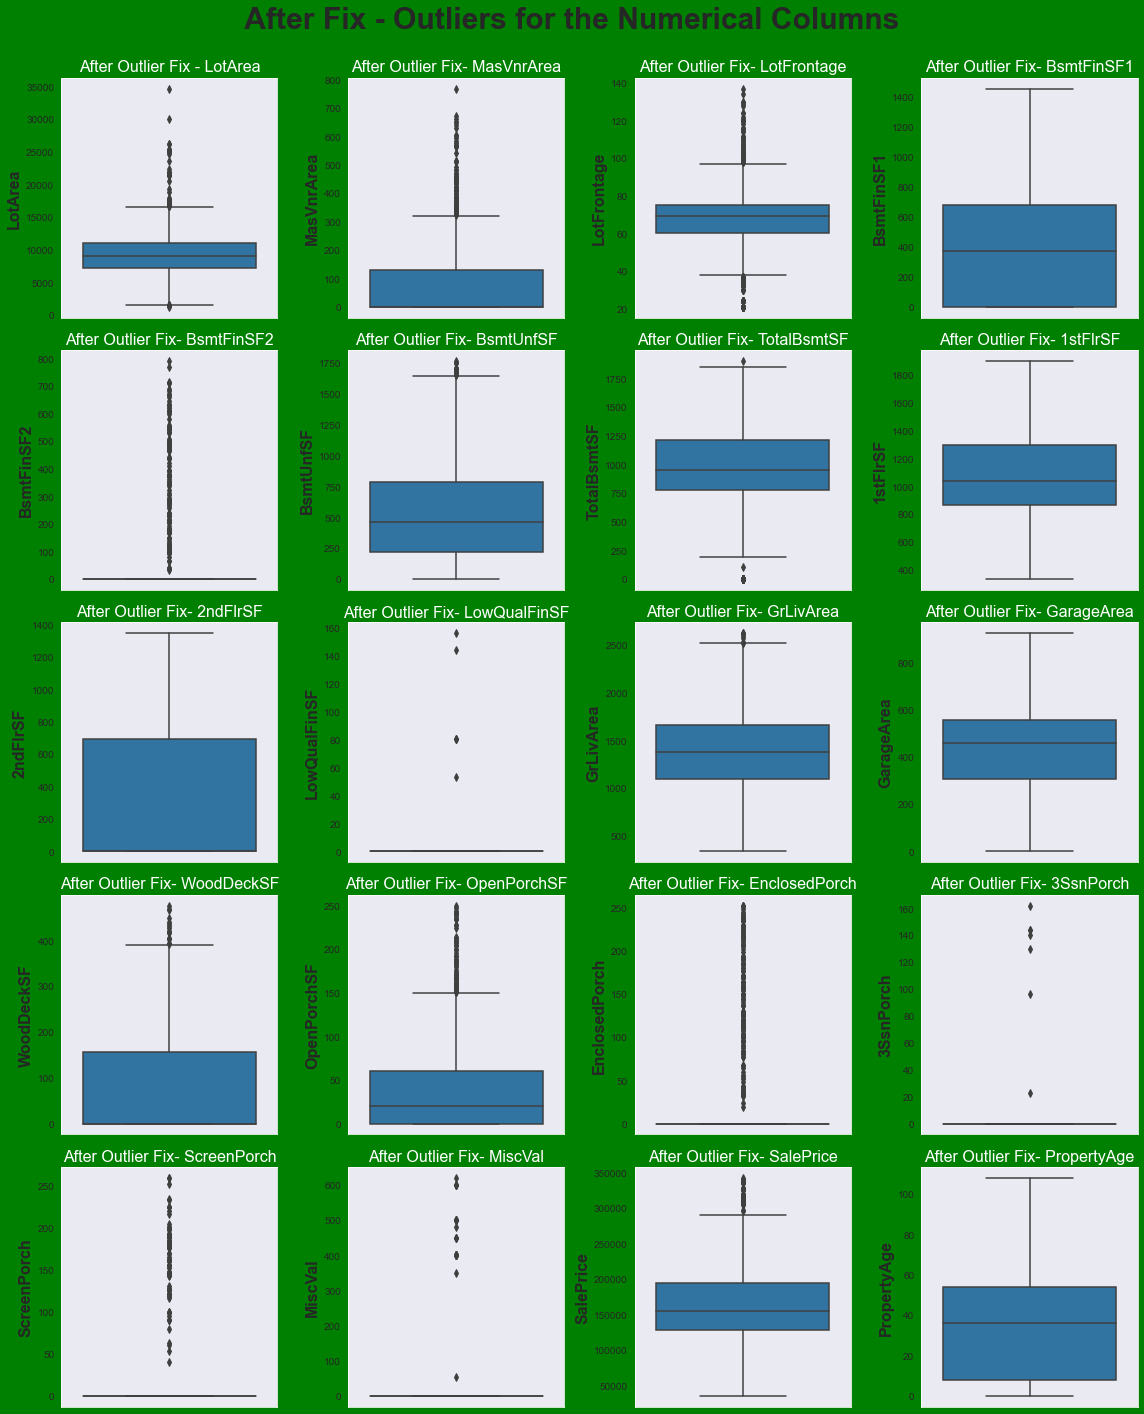

In [28]:
# Checking the outliers in box plot After Treating it

plt.figure(figsize=(16,20),facecolor='g')
plt.suptitle(" After Fix - Outliers for the Numerical Columns \n",fontweight ="bold",fontsize=30)
sns.set_style("dark")

# subplot 1
plt.subplot(5,4,1)
LA = sns.boxplot(y=Surprise_House_data['LotArea'])
LA.set_title('After Outlier Fix - LotArea',fontsize=16,color='w')
LA.set_ylabel('LotArea',fontsize=16,fontweight ="bold")
# subplot 2
plt.subplot(5,4,2)
FA = sns.boxplot(y=Surprise_House_data['MasVnrArea'])
FA.set_title('After Outlier Fix- MasVnrArea',fontsize=16,color='w')
FA.set_ylabel('MasVnrArea',fontsize=16,fontweight ="bold")
# subplot 3
plt.subplot(5,4,3)
FA_inv = sns.boxplot(y=Surprise_House_data['LotFrontage'])
FA_inv.set_title('After Outlier Fix- LotFrontage',fontsize=16,color='w')
FA_inv.set_ylabel('LotFrontage',fontsize=16,fontweight ="bold")
# subplot 4
plt.subplot(5,4,4)
FA_inv = sns.boxplot(y=Surprise_House_data['BsmtFinSF1'])
FA_inv.set_title('After Outlier Fix- BsmtFinSF1',fontsize=16,color='w')
FA_inv.set_ylabel('BsmtFinSF1',fontsize=16,fontweight ="bold")
# subplot 5
plt.subplot(5,4,5)
FA_inv = sns.boxplot(y=Surprise_House_data['BsmtFinSF2'])
FA_inv.set_title('After Outlier Fix- BsmtFinSF2',fontsize=16,color='w')
FA_inv.set_ylabel('BsmtFinSF2',fontsize=16,fontweight ="bold")
# subplot 6
plt.subplot(5,4,6)
FA_inv = sns.boxplot(y=Surprise_House_data['BsmtUnfSF'])
FA_inv.set_title('After Outlier Fix- BsmtUnfSF',fontsize=16,color='w')
FA_inv.set_ylabel('BsmtUnfSF',fontsize=16,fontweight ="bold")
# subplot 7
plt.subplot(5,4,7)
FA_inv = sns.boxplot(y=Surprise_House_data['TotalBsmtSF'])
FA_inv.set_title('After Outlier Fix- TotalBsmtSF',fontsize=16,color='w')
FA_inv.set_ylabel('TotalBsmtSF',fontsize=16,fontweight ="bold")
# subplot 8
plt.subplot(5,4,8)
FA_inv = sns.boxplot(y=Surprise_House_data['1stFlrSF'])
FA_inv.set_title('After Outlier Fix- 1stFlrSF',fontsize=16,color='w')
FA_inv.set_ylabel('1stFlrSF',fontsize=16,fontweight ="bold")
# subplot 9
plt.subplot(5,4,9)
FA_inv = sns.boxplot(y=Surprise_House_data['2ndFlrSF'])
FA_inv.set_title('After Outlier Fix- 2ndFlrSF',fontsize=16,color='w')
FA_inv.set_ylabel('2ndFlrSF',fontsize=16,fontweight ="bold")
# subplot 10
plt.subplot(5,4,10)
FA_inv = sns.boxplot(y=Surprise_House_data['LowQualFinSF'])
FA_inv.set_title('After Outlier Fix- LowQualFinSF',fontsize=16,color='w')
FA_inv.set_ylabel('LowQualFinSF',fontsize=16,fontweight ="bold")
# subplot 11
plt.subplot(5,4,11)
FA_inv = sns.boxplot(y=Surprise_House_data['GrLivArea'])
FA_inv.set_title('After Outlier Fix- GrLivArea',fontsize=16,color='w')
FA_inv.set_ylabel('GrLivArea',fontsize=16,fontweight ="bold")
# subplot 12
plt.subplot(5,4,12)
FA_inv = sns.boxplot(y=Surprise_House_data['GarageArea'])
FA_inv.set_title('After Outlier Fix- GarageArea',fontsize=16,color='w')
FA_inv.set_ylabel('GarageArea',fontsize=16,fontweight ="bold")
# subplot 13
plt.subplot(5,4,13)
FA_inv = sns.boxplot(y=Surprise_House_data['WoodDeckSF'])
FA_inv.set_title('After Outlier Fix- WoodDeckSF',fontsize=16,color='w')
FA_inv.set_ylabel('WoodDeckSF',fontsize=16,fontweight ="bold")
# subplot 14
plt.subplot(5,4,14)
FA_inv = sns.boxplot(y=Surprise_House_data['OpenPorchSF'])
FA_inv.set_title('After Outlier Fix- OpenPorchSF',fontsize=16,color='w')
FA_inv.set_ylabel('OpenPorchSF',fontsize=16,fontweight ="bold")
# subplot 15
plt.subplot(5,4,15)
FA_inv = sns.boxplot(y=Surprise_House_data['EnclosedPorch'])
FA_inv.set_title('After Outlier Fix- EnclosedPorch',fontsize=16,color='w')
FA_inv.set_ylabel('EnclosedPorch',fontsize=16,fontweight ="bold")
# subplot 16
plt.subplot(5,4,16)
FA_inv = sns.boxplot(y=Surprise_House_data['3SsnPorch'])
FA_inv.set_title('After Outlier Fix- 3SsnPorch',fontsize=16,color='w')
FA_inv.set_ylabel('3SsnPorch',fontsize=16,fontweight ="bold")
# subplot 17
plt.subplot(5,4,17)
FA_inv = sns.boxplot(y=Surprise_House_data['ScreenPorch'])
FA_inv.set_title('After Outlier Fix- ScreenPorch',fontsize=16,color='w')
FA_inv.set_ylabel('ScreenPorch',fontsize=16,fontweight ="bold")
# subplot 18
plt.subplot(5,4,18)
FA_inv = sns.boxplot(y=Surprise_House_data['MiscVal'])
FA_inv.set_title('After Outlier Fix- MiscVal',fontsize=16,color='w')
FA_inv.set_ylabel('MiscVal',fontsize=16,fontweight ="bold")
# subplot 19
plt.subplot(5,4,19)
FA_inv = sns.boxplot(y=Surprise_House_data['SalePrice'])
FA_inv.set_title('After Outlier Fix- SalePrice',fontsize=16,color='w')
FA_inv.set_ylabel('SalePrice',fontsize=16,fontweight ="bold")
# subplot 20
plt.subplot(5,4,20)
FA_inv = sns.boxplot(y=Surprise_House_data['PropertyAge'])
FA_inv.set_title('After Outlier Fix- PropertyAge',fontsize=16,color='w')
FA_inv.set_ylabel('PropertyAge',fontsize=16,fontweight ="bold")
plt.tight_layout()
plt.show()

In [29]:
# Checking outliers for the entire numerical columns

Surprise_House_data.describe(percentiles = [.25,.5,.75,.95,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,PropertyAge
count,1182.00000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,67.12775,9212.463621,78.840102,404.489848,36.043147,547.256345,987.789340,1088.274958,314.246193,0.501692,1403.022843,444.692047,82.505076,39.663283,19.489002,0.709814,11.010998,10.028765,164543.736041,36.324873
std,18.04519,3736.864044,131.618122,388.297951,123.696923,418.205138,350.685095,304.120358,396.730445,7.519858,404.457465,190.417488,107.168868,53.672952,53.946404,9.797504,42.214593,68.914623,55318.795178,28.640332
min,21.00000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000,0.000000
25%,60.00000,7200.000000,0.000000,0.000000,0.000000,216.000000,780.000000,864.000000,0.000000,0.000000,1092.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127500.000000,8.000000
50%,69.00000,9076.500000,0.000000,369.500000,0.000000,461.000000,950.000000,1041.000000,0.000000,0.000000,1377.000000,460.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,155000.000000,36.000000
75%,75.00000,10963.500000,128.000000,678.750000,0.000000,789.500000,1208.000000,1295.500000,693.250000,0.000000,1664.000000,556.000000,156.000000,60.000000,0.000000,0.000000,0.000000,0.000000,193784.250000,54.000000
95%,98.00000,15303.500000,359.950000,1147.500000,344.950000,1404.350000,1594.950000,1660.950000,1016.900000,0.000000,2126.600000,783.900000,294.950000,153.900000,164.000000,0.000000,126.000000,0.000000,274285.000000,89.000000
99%,120.00000,21883.020000,571.950000,1337.230000,630.760000,1640.090000,1752.190000,1801.380000,1242.190000,0.000000,2480.790000,879.140000,403.570000,229.140000,234.380000,0.000000,200.000000,455.700000,325057.000000,99.190000
max,137.00000,34650.000000,768.000000,1456.000000,791.000000,1768.000000,1902.000000,1902.000000,1347.000000,156.000000,2624.000000,923.000000,476.000000,250.000000,252.000000,162.000000,259.000000,620.000000,342643.000000,108.000000


In [30]:
# Drop these columns because they have more outliers even after treating it.
# Since these does not provide any valid predictions since it has more unique numeric values. Dropping it as well.


Surprise_House_data = Surprise_House_data.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch','MiscVal'], axis = 1)
Surprise_House_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleType,SaleCondition,SalePrice,RemodelledPropertyornot,PropertyAge
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,None,2,WD,Normal,208500,0,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,None,5,WD,Normal,181500,0,31
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,None,9,WD,Normal,223500,1,7
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,None,12,WD,Normal,250000,0,8
6,20,RL,75.0,10084,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,1Story,8,5,Gable,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,317,1686,Ex,Y,SBrkr,1694,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,636,TA,TA,Y,255,57,None,8,WD,Normal,307000,1,3


# Data Visualization

## Catgorical Data Visualization

In [31]:
# Choosing the object columns for categorical analysis

Surprise_House_data.select_dtypes(include=['object']).columns.values

array(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'SaleType',
       'SaleCondition', 'RemodelledPropertyornot'], dtype=object)

In [32]:
# Adding all those to a list for plotting the subplots

CategoricalVariablesList= ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'SaleType', 'SaleCondition', 'RemodelledPropertyornot']

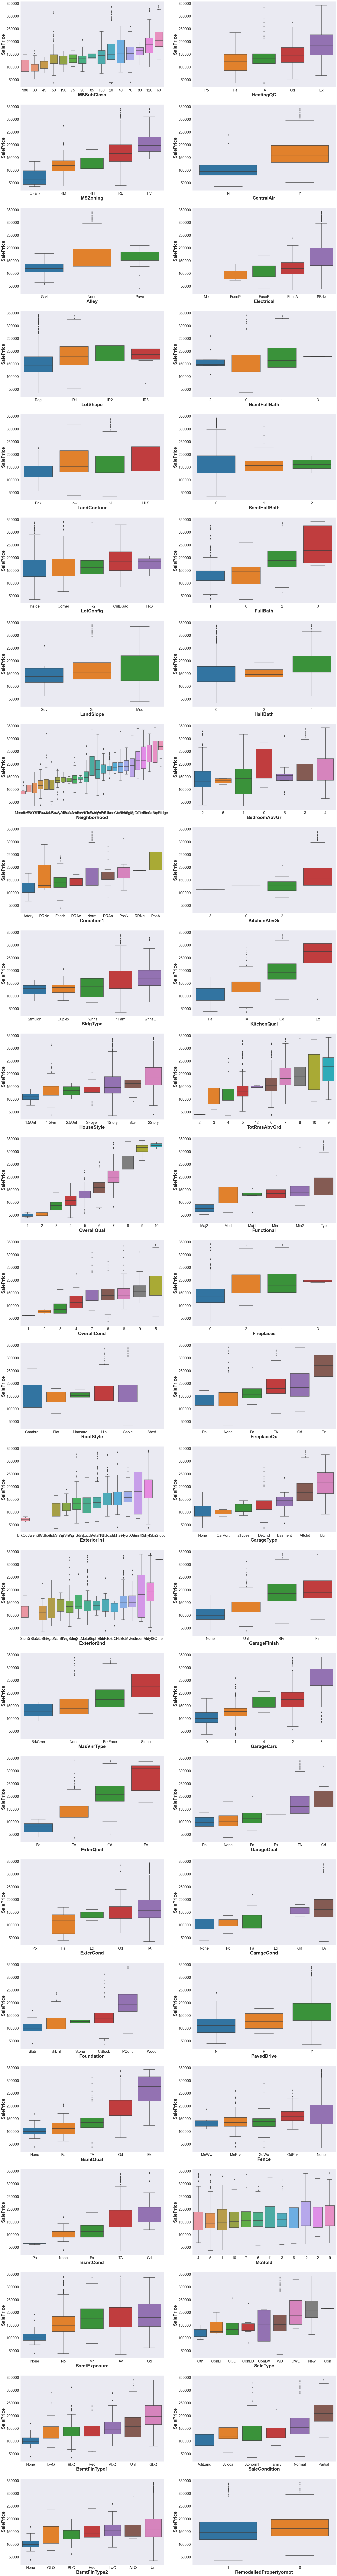

In [33]:
# Totally 50 categorical columns exists in the list. Plotting all those to check which column contributes more to the analysis
# Also to check any outliers are there in the categorical columns
# And came to know that all the columns are contributing more to the analysis

f,axes = plt.subplots(25,2, figsize=(30, 250))
for k, Columns in enumerate(CategoricalVariablesList):
    sortcolumns = sorted(Surprise_House_data.groupby(Columns)['SalePrice'].median().items(), key= lambda x:x[1])
    Sortorder = [x[0] for x in sortcolumns]
    AS = sns.boxplot(data = Surprise_House_data, x = Columns, y = 'SalePrice',  order=Sortorder, ax=axes[k%25, k//25])
    AS.xaxis.set_tick_params(labelsize=20)
    AS.yaxis.set_tick_params(labelsize=20)
    AS.set_xlabel(Columns,fontsize=25,fontweight ="bold")
    AS.set_ylabel('SalePrice',fontsize=25,fontweight ="bold")
    

## Numerical Data Visualization

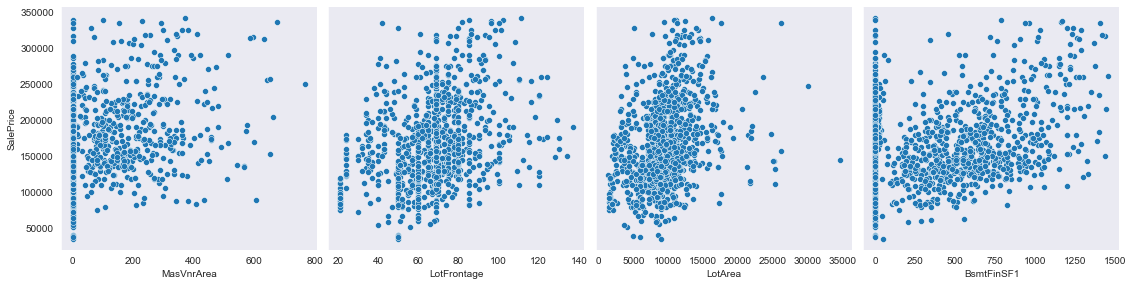

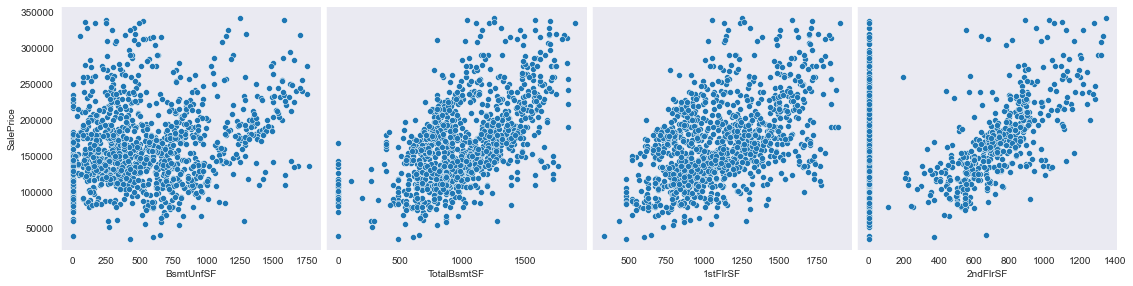

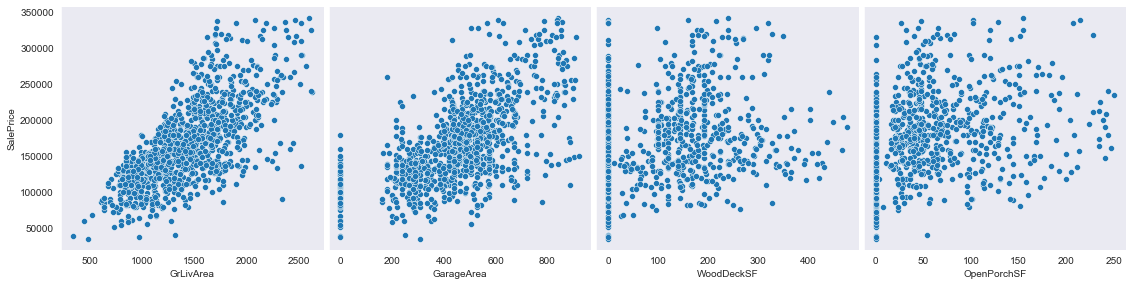

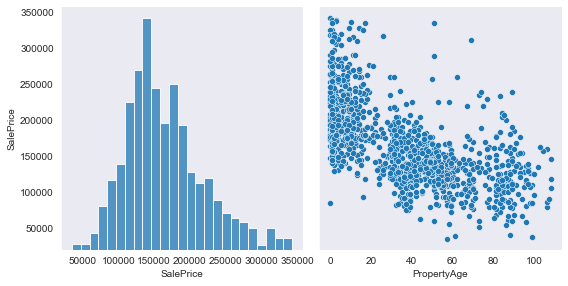

In [34]:
# To visualize all the numerical columns in a single chart , then plot pairplot using seaborn

sns.pairplot(Surprise_House_data, x_vars = ['MasVnrArea', 'LotFrontage','LotArea','BsmtFinSF1'], y_vars = 'SalePrice',height=4,)
sns.pairplot(Surprise_House_data, x_vars = ['BsmtUnfSF', 'TotalBsmtSF','1stFlrSF','2ndFlrSF'], y_vars = 'SalePrice',height=4)
sns.pairplot(Surprise_House_data, x_vars = ['GrLivArea', 'GarageArea','WoodDeckSF','OpenPorchSF'], y_vars = 'SalePrice',height=4)
sns.pairplot(Surprise_House_data, x_vars = ['SalePrice', 'PropertyAge'], y_vars = 'SalePrice',height=4)

plt.show()

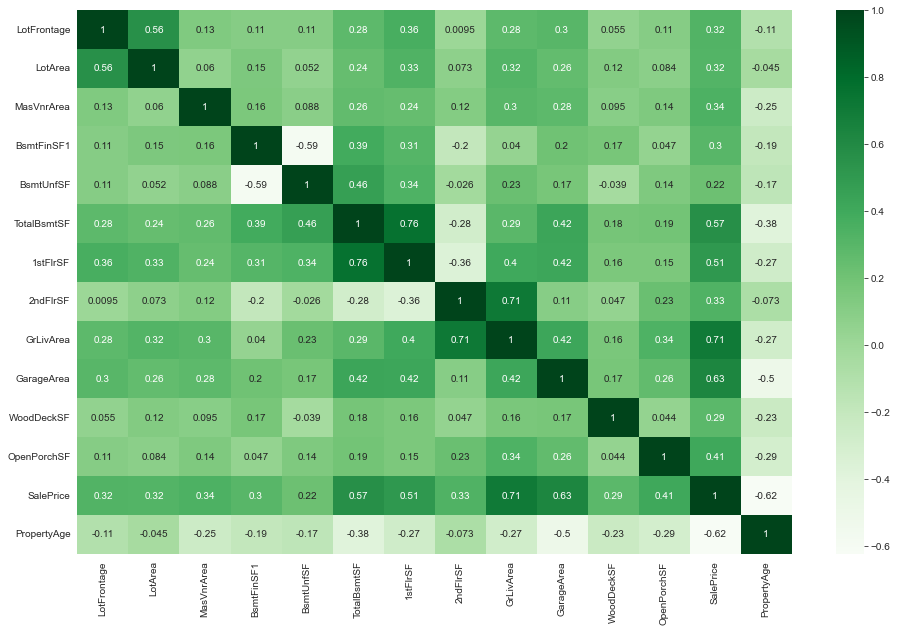

In [35]:
# Check the Correlation of numerical features

plt.figure(figsize = (16,10))
sns.heatmap(Surprise_House_data.corr(), annot = True, cmap = "Greens")
plt.show()

1. TotalBsmtSF,1stFlrSF  = Both are having 76% Correlation
2. GrLivArea   ,2ndFlrSF = Both are having 71% Correlation
3. SalesPrice  ,2ndFlrSF = Both are having 71% Correlation

# Data Preparation - Converting the Categorical to Numerical Features

## Manually Creating Numerical columns from categorical Columns

In [36]:
# Choosing the object columns for categorical analysis

Surprise_House_data.select_dtypes(include=['object']).columns.values

array(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'SaleType',
       'SaleCondition', 'RemodelledPropertyornot'], dtype=object)

In [37]:
Surprise_House_data['DmLotShape'] = Surprise_House_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3':0})
Surprise_House_data['DmExterQual'] = Surprise_House_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
Surprise_House_data['DmBsmtQual'] = Surprise_House_data['BsmtQual'].map({'Ex':5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
Surprise_House_data['DmHeatingQC'] = Surprise_House_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Surprise_House_data['DmKitchenQual'] = Surprise_House_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Surprise_House_data['DmFireplaceQu'] = Surprise_House_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
Surprise_House_data['DmBsmtExposure'] = Surprise_House_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
Surprise_House_data['DmBsmtFinType1'] = Surprise_House_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
Surprise_House_data['DmGarageFinish'] = Surprise_House_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
Surprise_House_data['DmBldgType'] = Surprise_House_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0})
Surprise_House_data['DmHouseStyle'] = Surprise_House_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,'1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0})
Surprise_House_data['Dm_Fence'] = Surprise_House_data['Fence'].map({'GdPrv':4, 'GdWo': 3, 'MnPrv': 2,'MnWw':1,'None':0 })
Surprise_House_data['Dm_LotConfig'] = Surprise_House_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2,'FR3': 1, 'None': 0})


In [38]:
# To View the records of the dataset to check how it is looks like in python notebook.
# Also to ensure the csv file is read properly or not,
Surprise_House_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleType,SaleCondition,SalePrice,RemodelledPropertyornot,PropertyAge,DmLotShape,DmExterQual,DmBsmtQual,DmHeatingQC,DmKitchenQual,DmFireplaceQu,DmBsmtExposure,DmBsmtFinType1,DmGarageFinish,DmBldgType,DmHouseStyle,Dm_Fence,Dm_LotConfig
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,None,2,WD,Normal,208500,0,5,3,4,4,5,4,0,1,6,2,1,4,0,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,None,5,WD,Normal,181500,0,31,3,3,4,5,3,3,4,5,2,1,1,0,2
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,None,9,WD,Normal,223500,1,7,2,4,4,5,4,3,2,6,2,1,4,0,5
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,None,12,WD,Normal,250000,0,8,2,4,4,5,4,3,3,6,2,1,4,0,2
6,20,RL,75.0,10084,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,1Story,8,5,Gable,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,317,1686,Ex,Y,SBrkr,1694,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,636,TA,TA,Y,255,57,None,8,WD,Normal,307000,1,3,3,4,5,5,4,4,3,6,2,1,1,0,5


In [39]:
# Again now checking the Rows and columns of the given dataset

Surprise_House_data.shape

(1182, 77)

In [40]:
# Now Drop the old Categorical columns which are converted to the numerical columns.

Surprise_House_data = Surprise_House_data.drop(['LotShape','ExterQual','BsmtQual','HeatingQC','KitchenQual', 'FireplaceQu', 'BsmtExposure', 'BsmtFinType1','GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 'LotConfig'], axis = 1)

In [41]:
# Again now checking the Rows and columns of the given dataset

Surprise_House_data.shape

(1182, 64)

In [42]:
Surprise_House_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LandContour,LandSlope,Neighborhood,Condition1,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,RemodelledPropertyornot,PropertyAge,DmLotShape,DmExterQual,DmBsmtQual,DmHeatingQC,DmKitchenQual,DmFireplaceQu,DmBsmtExposure,DmBsmtFinType1,DmGarageFinish,DmBldgType,DmHouseStyle,Dm_Fence,Dm_LotConfig
0,60,RL,65.0,8450,None,Lvl,Gtl,CollgCr,Norm,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,TA,706,Unf,150,856,Y,SBrkr,856,854,1710,1,0,2,1,3,1,8,Typ,0,Attchd,2,548,TA,TA,Y,0,61,2,WD,Normal,208500,0,5,3,4,4,5,4,0,1,6,2,1,4,0,5
1,20,RL,80.0,9600,None,Lvl,Gtl,Veenker,Feedr,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,978,Unf,284,1262,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,6,Typ,1,Attchd,2,460,TA,TA,Y,298,0,5,WD,Normal,181500,0,31,3,3,4,5,3,3,4,5,2,1,1,0,2
2,60,RL,68.0,11250,None,Lvl,Gtl,CollgCr,Norm,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,TA,PConc,TA,486,Unf,434,920,Y,SBrkr,920,866,1786,1,0,2,1,3,1,6,Typ,1,Attchd,2,608,TA,TA,Y,0,42,9,WD,Normal,223500,1,7,2,4,4,5,4,3,2,6,2,1,4,0,5
4,60,RL,84.0,14260,None,Lvl,Gtl,NoRidge,Norm,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,TA,PConc,TA,655,Unf,490,1145,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,9,Typ,1,Attchd,3,836,TA,TA,Y,192,84,12,WD,Normal,250000,0,8,2,4,4,5,4,3,3,6,2,1,4,0,2
6,20,RL,75.0,10084,None,Lvl,Gtl,Somerst,Norm,8,5,Gable,VinylSd,VinylSd,Stone,186.0,TA,PConc,TA,1369,Unf,317,1686,Y,SBrkr,1694,0,1694,1,0,2,0,3,1,7,Typ,1,Attchd,2,636,TA,TA,Y,255,57,8,WD,Normal,307000,1,3,3,4,5,5,4,4,3,6,2,1,1,0,5


In [43]:
# Choosing the object columns for categorical analysis

print(Surprise_House_data.select_dtypes(include=['object','int64','float64']).columns.values)
print(len(Surprise_House_data.select_dtypes(include=['object','int64','float64']).columns.values))

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Alley' 'LandContour'
 'LandSlope' 'Neighborhood' 'Condition1' 'OverallQual' 'OverallCond'
 'RoofStyle' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterCond' 'Foundation' 'BsmtCond' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtUnfSF' 'TotalBsmtSF' 'CentralAir' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'GarageType' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'MoSold' 'SaleType'
 'SaleCondition' 'SalePrice' 'RemodelledPropertyornot' 'PropertyAge'
 'DmLotShape' 'DmExterQual' 'DmBsmtQual' 'DmHeatingQC' 'DmKitchenQual'
 'DmFireplaceQu' 'DmBsmtExposure' 'DmBsmtFinType1' 'DmGarageFinish'
 'DmBldgType' 'DmHouseStyle' 'Dm_Fence' 'Dm_LotConfig']
64


## Creating Dummy Variables for Numerical columns from categorical Columns

In [44]:
# Choosing the object columns for categorical analysis

print(Surprise_House_data.select_dtypes(include=['object']).columns.values)
print(len(Surprise_House_data.select_dtypes(include=['object']).columns.values))

['MSSubClass' 'MSZoning' 'Alley' 'LandContour' 'LandSlope' 'Neighborhood'
 'Condition1' 'OverallQual' 'OverallCond' 'RoofStyle' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterCond' 'Foundation' 'BsmtCond'
 'BsmtFinType2' 'CentralAir' 'Electrical' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'GarageType' 'GarageCars' 'GarageQual'
 'GarageCond' 'PavedDrive' 'MoSold' 'SaleType' 'SaleCondition'
 'RemodelledPropertyornot']
37


In [45]:
# Creating dummy variables using get_dummies command

MSZoning_dummy=pd.get_dummies(Surprise_House_data.MSZoning,drop_first=True)
Alley_dummy=pd.get_dummies(Surprise_House_data.Alley,drop_first=True)
LandContour_dummy=pd.get_dummies(Surprise_House_data.LandContour,drop_first=True)
LandSlope_dummy=pd.get_dummies(Surprise_House_data.LandSlope,drop_first=True)
Neighborhood_dummy=pd.get_dummies(Surprise_House_data.Neighborhood,drop_first=True)
Condition1_dummy=pd.get_dummies(Surprise_House_data.Condition1,drop_first=True)
RoofStyle_dummy=pd.get_dummies(Surprise_House_data.RoofStyle,drop_first=True)
Exterior1st_dummy=pd.get_dummies(Surprise_House_data.Exterior1st,drop_first=True)
Exterior2nd_dummy=pd.get_dummies(Surprise_House_data.Exterior2nd,drop_first=True)
MasVnrType_dummy=pd.get_dummies(Surprise_House_data.MasVnrType,drop_first=True)
ExterCond_dummy=pd.get_dummies(Surprise_House_data.ExterCond,drop_first=True)
Foundation_dummy=pd.get_dummies(Surprise_House_data.Foundation,drop_first=True)
BsmtCond_dummy=pd.get_dummies(Surprise_House_data.BsmtCond,drop_first=True)
BsmtFinType2_dummy=pd.get_dummies(Surprise_House_data.BsmtFinType2,drop_first=True)
CentralAir_dummy=pd.get_dummies(Surprise_House_data.CentralAir,drop_first=True)
Electrical_dummy=pd.get_dummies(Surprise_House_data.Electrical,drop_first=True)
Functional_dummy=pd.get_dummies(Surprise_House_data.Functional,drop_first=True)
GarageType_dummy=pd.get_dummies(Surprise_House_data.GarageType,drop_first=True)
GarageQual_dummy=pd.get_dummies(Surprise_House_data.GarageQual,drop_first=True)
GarageCond_dummy=pd.get_dummies(Surprise_House_data.GarageCond,drop_first=True)
PavedDrive_dummy=pd.get_dummies(Surprise_House_data.PavedDrive,drop_first=True)
SaleType_dummy=pd.get_dummies(Surprise_House_data.SaleType,drop_first=True)
SaleCondition_dummy=pd.get_dummies(Surprise_House_data.SaleCondition,drop_first=True)

# Adding those dummy columns to the dataset
Surprise_House_data=pd.concat([Surprise_House_data,MSZoning_dummy,Alley_dummy,LandContour_dummy,LandSlope_dummy,
                               Neighborhood_dummy,Condition1_dummy,RoofStyle_dummy,Exterior1st_dummy,Exterior2nd_dummy,
                               MasVnrType_dummy,ExterCond_dummy,Foundation_dummy,BsmtCond_dummy,BsmtFinType2_dummy,
                               CentralAir_dummy,Electrical_dummy,Functional_dummy,GarageType_dummy,GarageQual_dummy,
                               GarageCond_dummy,PavedDrive_dummy,SaleType_dummy,SaleCondition_dummy],axis=1)

# Removing the original columns which was there before dummy variables creation.Since we created dummy variables, so drop them.

Surprise_House_data.drop(['MSZoning','Alley','LandContour','LandSlope','Neighborhood','Condition1','RoofStyle','Exterior1st',
                          'Exterior2nd','MasVnrType','ExterCond','Foundation','BsmtCond','BsmtFinType2','CentralAir',
                          'Electrical','Functional','GarageType','GarageQual','GarageCond','PavedDrive','SaleType',
                          'SaleCondition'], axis = 1, inplace = True)

In [46]:
# checking the Rows and columns of the given dataset after dummy variables creation

Surprise_House_data.shape

(1182, 180)

In [47]:
# To View the records of the dataset

Surprise_House_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,RemodelledPropertyornot,PropertyAge,DmLotShape,DmExterQual,DmBsmtQual,DmHeatingQC,DmKitchenQual,DmFireplaceQu,DmBsmtExposure,DmBsmtFinType1,DmGarageFinish,DmBldgType,DmHouseStyle,Dm_Fence,Dm_LotConfig,FV,RH,RL,RM,None,Pave,HLS,Low,Lvl,...,None,Po,TA,BLQ,GLQ,LwQ,None,Rec,Unf,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Mod,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,None,Fa,Gd,None,Po,TA,Fa,Gd,None,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,2,208500,0,5,3,4,4,5,4,0,1,6,2,1,4,0,5,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,5,181500,0,31,3,3,4,5,3,3,4,5,2,1,1,0,2,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,0,2,1,3,1,6,1,2,608,0,42,9,223500,1,7,2,4,4,5,4,3,2,6,2,1,4,0,5,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,3,836,192,84,12,250000,0,8,2,4,4,5,4,3,3,6,2,1,4,0,2,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,20,75.0,10084,8,5,186.0,1369,317,1686,1694,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,8,307000,1,3,3,4,5,5,4,4,3,6,2,1,1,0,5,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [48]:
# Converting all the categorical dtypes from int to object. 
# Since the linear regression needs to be done, then all the columns should be in numerical columns

Surprise_House_data['MSSubClass'] = Surprise_House_data['MSSubClass'].astype('int64')
Surprise_House_data['MoSold'] = Surprise_House_data['MoSold'].astype('int64')
Surprise_House_data['OverallQual'] = Surprise_House_data['OverallQual'].astype('int64')
Surprise_House_data['OverallCond'] = Surprise_House_data['OverallCond'].astype('int64')
Surprise_House_data['BsmtFullBath'] = Surprise_House_data['BsmtFullBath'].astype('int64')
Surprise_House_data['BsmtHalfBath'] = Surprise_House_data['BsmtHalfBath'].astype('int64')
Surprise_House_data['FullBath'] = Surprise_House_data['FullBath'].astype('int64')
Surprise_House_data['HalfBath'] = Surprise_House_data['HalfBath'].astype('int64')
Surprise_House_data['BedroomAbvGr'] = Surprise_House_data['BedroomAbvGr'].astype('int64')
Surprise_House_data['KitchenAbvGr'] = Surprise_House_data['KitchenAbvGr'].astype('int64')
Surprise_House_data['TotRmsAbvGrd'] = Surprise_House_data['TotRmsAbvGrd'].astype('int64')
Surprise_House_data['Fireplaces'] = Surprise_House_data['Fireplaces'].astype('int64')
Surprise_House_data['GarageCars'] = Surprise_House_data['GarageCars'].astype('int64')
Surprise_House_data['RemodelledPropertyornot'] = Surprise_House_data['RemodelledPropertyornot'].astype('int64')

# Train and Test Split

In [50]:
# Now we are splitting whole dataset into two splits under some ratio.train split and test split
Surprise_House_data_train, Surprise_House_data_test = train_test_split(Surprise_House_data, train_size = 0.7, random_state = 100)

# Checking the splits are done properly using shape command
print (Surprise_House_data_train.shape)
print (Surprise_House_data_test.shape)

(827, 180)
(355, 180)


In [52]:
# Creating a variable to store the multiple columns which are required for Rescaling

num_vars = ['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
           'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF','2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd',  'Fireplaces','GarageCars',
           'GarageArea',  'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice','DmLotShape', 'DmExterQual', 'DmBsmtQual',
           'DmHeatingQC', 'DmKitchenQual', 'DmFireplaceQu', 'DmBsmtExposure','DmBsmtFinType1', 'DmGarageFinish', 
           'DmBldgType', 'DmHouseStyle','Dm_Fence', 'Dm_LotConfig','PropertyAge']


# Scaling the Train Dataset

In [53]:
# Instantiate an object

scaler = MinMaxScaler()

# Now Using Scaler.fit_transform is used to learn the dataset and perform on the dataset(both)

Surprise_House_data_train[num_vars] = scaler.fit_transform(Surprise_House_data_train[num_vars])

In [54]:
# To View the records of the dataset

Surprise_House_data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,RemodelledPropertyornot,PropertyAge,DmLotShape,DmExterQual,DmBsmtQual,DmHeatingQC,DmKitchenQual,DmFireplaceQu,DmBsmtExposure,DmBsmtFinType1,DmGarageFinish,DmBldgType,DmHouseStyle,Dm_Fence,Dm_LotConfig,FV,RH,RL,RM,None,Pave,HLS,Low,Lvl,...,None,Po,TA,BLQ,GLQ,LwQ,None,Rec,Unf,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Mod,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,None,Fa,Gd,None,Po,TA,Fa,Gd,None,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
603,0.823529,0.077586,0.056432,0.666667,0.500,0.0,0.000000,0.339367,0.325203,0.083274,0.445434,0.323194,0.000000,0.0,0.666667,0.5,0.333333,0.333333,0.111111,0.000000,0.50,0.520043,0.0,0.696356,0.454545,0.371132,1,0.055556,1.000000,0.666667,0.8,1.00,0.666667,0.0,0.25,0.166667,0.666667,0.75,0.428571,0.0,1.0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1145,0.176471,0.267241,0.148126,0.444444,0.625,0.0,0.000000,0.589367,0.564770,0.397865,0.396437,0.501901,0.000000,0.0,0.333333,0.0,0.500000,0.333333,0.555556,0.333333,0.25,0.243770,0.0,0.000000,0.636364,0.364569,1,0.722222,1.000000,0.333333,0.6,1.00,0.333333,0.8,0.25,0.166667,0.333333,0.00,0.285714,0.0,1.0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
463,0.294118,0.456897,0.320480,0.555556,0.750,0.0,0.223901,0.220023,0.387534,0.260498,0.602079,0.541825,0.000000,0.0,0.333333,0.5,0.500000,0.333333,0.333333,0.333333,0.25,0.260022,0.0,0.000000,0.636364,0.494843,1,0.685185,0.666667,0.333333,0.6,0.25,0.333333,0.8,0.25,0.333333,0.333333,0.00,0.428571,0.0,1.0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
127,0.147059,0.293103,0.092594,0.444444,0.750,0.0,0.079670,0.314480,0.364228,0.254093,0.000000,0.152091,0.000000,0.0,0.333333,0.0,0.500000,0.333333,0.222222,0.333333,0.00,0.000000,0.0,0.000000,0.454545,0.161119,1,0.712963,0.666667,0.333333,0.6,1.00,0.333333,0.6,0.25,0.333333,0.000000,0.00,0.142857,0.0,1.0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
419,0.000000,0.379310,0.214393,0.444444,0.625,0.0,0.532280,0.158937,0.572358,0.407829,0.000000,0.254753,0.333333,0.0,0.333333,0.0,0.500000,0.333333,0.333333,0.333333,0.25,0.329361,0.0,0.344130,0.545455,0.341599,0,0.388889,1.000000,0.333333,0.6,1.00,0.333333,0.4,0.25,0.666667,0.333333,0.00,0.000000,0.0,1.0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [55]:
# Before building the model , need to get the x and y from the trained dataset
y_train = Surprise_House_data_train.pop('SalePrice')
X_train = Surprise_House_data_train

In [56]:
# Then Normally fit the linear regression using the trained dataset
# And also checking the R2 Score of the train dataset

lm = LinearRegression()
aa = lm.fit(X_train,y_train)
y_train_pred = lm.predict(X_train)
print('R-squared:Trained dataset  :',r2_score(y_train_pred, y_train))

R-squared:Trained dataset  : 0.9012690126220656


# Scaling the Test Dataset

In [58]:
# Creating a variable to store the multiple columns which are required for Rescaling for test dataset

num_vars = ['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
           'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF','2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd',  'Fireplaces','GarageCars',
           'GarageArea',  'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice','DmLotShape', 'DmExterQual', 'DmBsmtQual',
           'DmHeatingQC', 'DmKitchenQual', 'DmFireplaceQu', 'DmBsmtExposure','DmBsmtFinType1', 'DmGarageFinish', 
           'DmBldgType', 'DmHouseStyle','Dm_Fence', 'Dm_LotConfig','PropertyAge']



In [59]:
# Now Using Scaler.fit_transform is used to learn the dataset and perform on the dataset(both)

Surprise_House_data_test[num_vars] = scaler.transform(Surprise_House_data_test[num_vars])

In [60]:
# Before building the model , need to get the x and y from the test dataset
y_test = Surprise_House_data_test.pop('SalePrice')
X_test = Surprise_House_data_test

In [61]:
# Predicting the testset 
# And also checking the R2 Score of the test dataset

y_test_pred = lm.predict(X_test)
print('R-squared:Test dataset  :',r2_score(y_test_pred, y_test))

R-squared:Test dataset  : -0.003090169538142229


1. You can see that Test r2 score is very low compared to Train r2 score.
2. So definitely Regularization techniques required
3. Lets try with both Ridge and Lasso techniques

# Linear Regression After RFE

In [62]:
# So now moving to RFE to reduce the multiple columns difficulty
# Here we are using Automated chosing variable approach called RFE . Top 75 variables to perform this activity.
# Here we are using fit method for rfe.

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 75)                                           
rfe = rfe.fit(X_train, y_train)

In [63]:
# Checking the selected columns using rfe

selectedcol = X_train.columns[rfe.support_]
X_train_rfe = X_train[selectedcol]
X_test_rfe = X_test[selectedcol]
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
y_test_pred = lm.predict(X_test_rfe)

In [64]:
print('R-squared:Train dataset  :',r2_score(y_train_pred, y_train))
print('R-squared:Test dataset  :',r2_score(y_test_pred, y_test))

R-squared:Train dataset  : 0.9142308676493272
R-squared:Test dataset  : -0.00281701002100343


# Ridge Regression

In [65]:
# Now Starting with Ridge Regression. This is used to choose the best alpha so that we get better model
# Also we will come to know what are the variables contributing much to the analysis

params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Performing cross validation with folds 5 with r2 as scoring
folds = 5
model_Ridge = GridSearchCV(estimator = ridge,  param_grid = params, scoring= 'r2',  cv = folds, 
                        return_train_score=True,verbose = 1)            

model_Ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
# Choosing the 'param_alpha','mean_train_score','mean_test_score','rank_test_score' values to check which alpha is good

model_RidgeResults = pd.DataFrame(model_Ridge.cv_results_)
model_RidgeResults[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,3.0,0.928732,0.887637,1
16,4.0,0.925953,0.887558,2
17,5.0,0.923387,0.886931,3
14,2.0,0.931803,0.886531,4
18,6.0,0.920988,0.886014,5
19,7.0,0.918723,0.884932,6
20,8.0,0.916569,0.883751,7
21,9.0,0.914508,0.882509,8
13,1.0,0.935350,0.882072,9
22,10.0,0.912526,0.881229,10


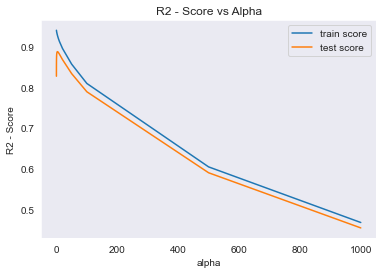

In [67]:
# Just for the Check ploting the r2 score against the alpha trend for both train set and test set

plt.plot(model_RidgeResults['param_alpha'], model_RidgeResults['mean_train_score'])
plt.plot(model_RidgeResults['param_alpha'], model_RidgeResults['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('R2 - Score')
plt.title("R2 - Score vs Alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [68]:
# From the graph and above tabular column we came to know alpha 0.3 is good one. but lets find it out using Ridge commands
model_Ridge.best_estimator_

Ridge(alpha=3.0)

## For Alpha 3

In [69]:
# Check the coefficient values with lambda value as 3
alpha = 3
ridge = Ridge(alpha=alpha)

lr1 = ridge.fit(X_train, y_train)
y_train_pred = lr1.predict(X_train)
y_test_pred = lr1.predict(X_test)
ridge.coef_

array([-2.47123156e-02,  1.02340516e-02,  6.18810578e-02,  1.63005227e-01,
        7.37027061e-02,  3.04563858e-02,  6.45667362e-02,  1.47318141e-02,
        7.77713088e-02,  8.56536238e-02,  1.01847274e-01,  1.22407441e-01,
        4.24924697e-02, -8.80336268e-03,  3.36109483e-02,  1.02339502e-02,
       -2.36308406e-02, -4.96644026e-02,  1.54461234e-02,  3.02039866e-02,
        4.29190398e-02,  6.21218574e-02,  3.62272679e-02,  2.73524034e-02,
        6.95665086e-05,  7.19557993e-03, -7.18043415e-02, -2.17842460e-03,
        4.28671450e-02,  5.26183957e-02,  1.87831035e-02,  3.67451908e-02,
        1.05259922e-02,  3.12011321e-02,  1.33134233e-02,  2.82065043e-02,
       -4.88433732e-02, -1.25804414e-03, -1.79848347e-03,  5.68765635e-03,
        1.41612733e-02,  1.91292751e-02,  3.59952358e-02,  8.85396868e-03,
        7.43975965e-04, -9.99239398e-03, -3.86887625e-03, -8.40926649e-03,
       -4.98507424e-03,  1.58328628e-02, -3.55600645e-03, -2.56755804e-03,
        2.66813552e-02,  

In [70]:
# These are metrics which are taken against the alpha 3
metric1 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric1.append(r2_train_lr)
r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric1.append(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric1.append(rss1_lr)
rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric1.append(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9264651572161158
0.9074925860389815
1.886638917558394
1.2265158013349724
0.002281304616152834
0.003454974088267528


## For Alpha 6

In [71]:
# Check the coefficient values with lambda value as 6

alpha = 6
ridge5 = Ridge(alpha=alpha)

ridge5.fit(X_train, y_train)
y_train_pred = ridge5.predict(X_train)
y_test_pred = ridge5.predict(X_test)
ridge.coef_

array([-2.47123156e-02,  1.02340516e-02,  6.18810578e-02,  1.63005227e-01,
        7.37027061e-02,  3.04563858e-02,  6.45667362e-02,  1.47318141e-02,
        7.77713088e-02,  8.56536238e-02,  1.01847274e-01,  1.22407441e-01,
        4.24924697e-02, -8.80336268e-03,  3.36109483e-02,  1.02339502e-02,
       -2.36308406e-02, -4.96644026e-02,  1.54461234e-02,  3.02039866e-02,
        4.29190398e-02,  6.21218574e-02,  3.62272679e-02,  2.73524034e-02,
        6.95665086e-05,  7.19557993e-03, -7.18043415e-02, -2.17842460e-03,
        4.28671450e-02,  5.26183957e-02,  1.87831035e-02,  3.67451908e-02,
        1.05259922e-02,  3.12011321e-02,  1.33134233e-02,  2.82065043e-02,
       -4.88433732e-02, -1.25804414e-03, -1.79848347e-03,  5.68765635e-03,
        1.41612733e-02,  1.91292751e-02,  3.59952358e-02,  8.85396868e-03,
        7.43975965e-04, -9.99239398e-03, -3.86887625e-03, -8.40926649e-03,
       -4.98507424e-03,  1.58328628e-02, -3.55600645e-03, -2.56755804e-03,
        2.66813552e-02,  

In [72]:
# These are metrics which are taken against the alpha 6
metric2 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)
r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)
rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9202972804500703
0.9025828520765738
2.04488439555207
1.291611840964634
0.0024726534408126602
0.0036383432139848845


## Compare Results for Alpha 3 and Alpha 6

In [73]:
Ridge_df = pd.DataFrame({'Alpha': [3,6],'Train Accuracy':[lr1.score(X_train,y_train),ridge5.score(X_train,y_train)],
                        'Test Accuracy':[lr1.score(X_test,y_test),ridge5.score(X_test,y_test)]})
Ridge_df.head()

,Alpha,Train Accuracy,Test Accuracy
0,3,0.926465,0.907493
1,6,0.920297,0.902583


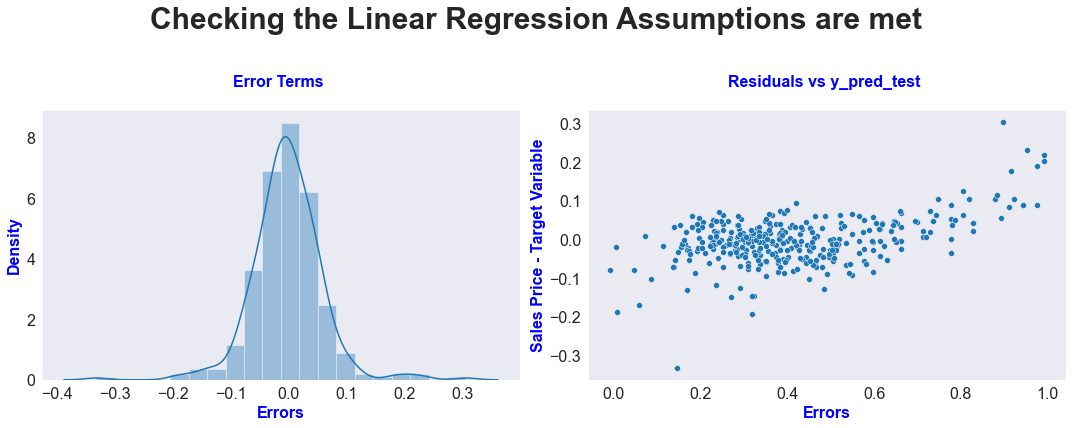

In [74]:
# This Graph helps to understand the linear regression met all the assumptions correctly.
# All values are normally distributed around zero.

plt.figure(figsize=(15,10))
sns.set_style("dark")
plt.suptitle("Checking the Linear Regression Assumptions are met\n",fontweight ="bold",fontsize=30)
# subplot 1
plt.subplot(2, 2 ,1)
AS = sns.distplot((y_test - y_test_pred), bins = 20)
AS.set_title('Error Terms \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('Errors',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('Density',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 2
plt.subplot(2,2,2)
AS = sns.scatterplot(y_test,(y_test - y_test_pred))
AS.set_title('Residuals vs y_pred_test \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('Errors',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('Sales Price - Target Variable',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
plt.tight_layout()
plt.show()

# Lasso Regression

In [75]:
# Now Starting with Lasso Regression. This is used to choose the best alpha so that we get better model
# Also we will come to know what are the variables contributing much to the analysis

params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# To Perform cross validation with folds 5  with r2 as scoring
folds = 5
model_Lasso = GridSearchCV(estimator = lasso,  param_grid = params, scoring= 'r2',  cv = folds, 
                        return_train_score=True,verbose = 1)            

model_Lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [76]:
# Choosing the 'param_alpha','mean_train_score','mean_test_score','rank_test_score' values to check which alpha is good

Lasso_results = pd.DataFrame(model_Lasso.cv_results_)
Lasso_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,0.932134,0.887630,1
1,0.001,0.897111,0.872578,2
2,0.01,0.642381,0.627209,3
3,0.05,0.017126,0.003085,4
25,100,0.000000,-0.014267,5
24,50,0.000000,-0.014267,5
23,20,0.000000,-0.014267,5
22,10.0,0.000000,-0.014267,5
21,9.0,0.000000,-0.014267,5
20,8.0,0.000000,-0.014267,5


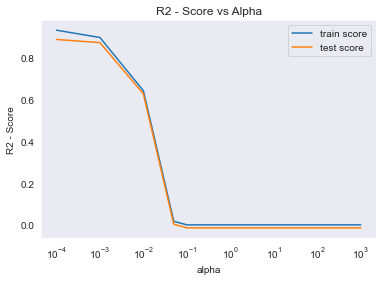

In [77]:
# Just for the Check ploting the r2 score against the alpha trend for both train set and test set
# Since most of the mean train scores are zero so using log for better visibility

plt.plot(Lasso_results['param_alpha'],Lasso_results['mean_train_score'])
plt.plot(Lasso_results['param_alpha'],Lasso_results['mean_test_score'])
plt.xscale('log')
plt.xlabel ('alpha')
plt.ylabel ('R2 - Score')
plt.title("R2 - Score vs Alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [78]:
# From the graph and above tabular column we came to know alpha 0.0001 is good one. but lets find it out using Lasso commands

print(model_Lasso.best_params_)
print(model_Lasso.best_score_)

{'alpha': 0.0001}
0.8876298665010356


## For Alpha 0.0001

In [79]:
# Check the Lasso coefficient values with lambda value as 0.0001 and their metrics are stored in a array for future analysis

lasso = Lasso(alpha=0.0001)
lr3 = lasso.fit(X_train,y_train)
y_train_pred = lr3.predict(X_train)
y_test_pred = lr3.predict(X_test)
metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)
r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)
rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9273475611417143
0.911149809936955
1.8639996145556905
1.1780262510620116
0.002253929400913773
0.0033183838058084836


## For Alpha 0.001

In [80]:
# Check the Lasso coefficient values with lambda value as 0.001 and their metrics are stored in a array for future analysis

lasso = Lasso(alpha=0.001)
lr2 = lasso.fit(X_train,y_train)
y_train_pred = lr2.predict(X_train)
y_test_pred = lr2.predict(X_test)
metric4 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric4.append(r2_train_lr)
r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric4.append(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric4.append(rss1_lr)
rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric4.append(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8948217191087013
0.8857915318569219
2.698495441060505
1.514240695159573
0.0032629932781868256
0.004265466746928375


## Compare Results for Alpha 0.0001 and Alpha 0.001

In [81]:
lasso_df = pd.DataFrame({'Alpha': [0.0001,0.002],'Train Accuracy':[lr1.score(X_train,y_train),lr2.score(X_train,y_train)],
                        'Test Accuracy':[lr1.score(X_test,y_test),lr2.score(X_test,y_test)]})
lasso_df.head()

,Alpha,Train Accuracy,Test Accuracy
0,0.0001,0.926465,0.907493
1,0.0020,0.894822,0.885792


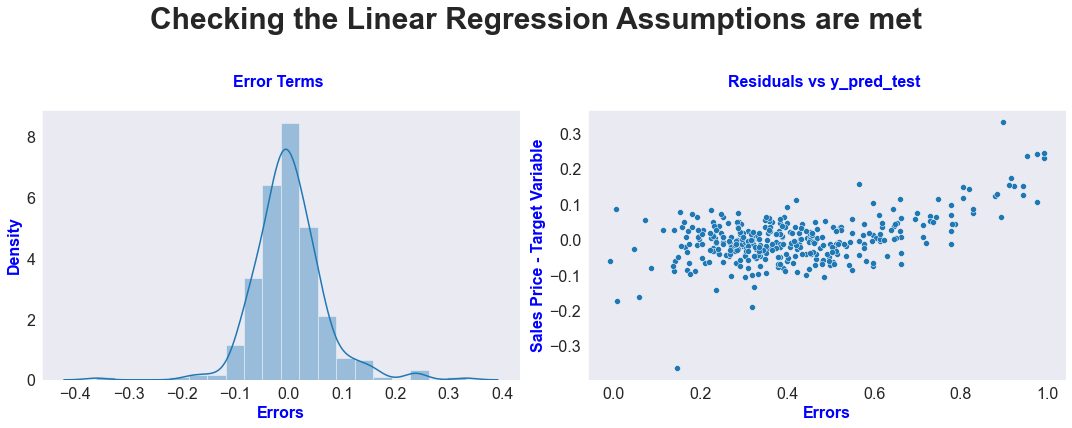

In [82]:
# This Graph helps to understand the linear regression met all the assumptions correctly.
# All values are normally distributed around zero.

plt.figure(figsize=(15,10))
sns.set_style("dark")
plt.suptitle("Checking the Linear Regression Assumptions are met\n",fontweight ="bold",fontsize=30)
# subplot 1
plt.subplot(2, 2 ,1)
AS = sns.distplot((y_test - y_test_pred), bins = 20)
AS.set_title('Error Terms \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('Errors',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('Density',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 2
plt.subplot(2,2,2)
AS = sns.scatterplot(y_test,(y_test - y_test_pred))
AS.set_title('Residuals vs y_pred_test \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('Errors',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('Sales Price - Target Variable',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
plt.tight_layout()
plt.show()

# Compare the Features for Ridge and Lasso

In [83]:
# CHecking the top 10 feature variables of lasso model parameters which influence the decision more
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
newlassocolumns = X_train.columns
newlassocolumns = newlassocolumns.insert(0,'const')
lasso_coefficient = pd.DataFrame(list(zip(newlassocolumns,model_param)))
lasso_coefficient.columns = ['Feature','Coefficient']
lasso_coefficient['Coefficient']=lasso_coefficient['Coefficient'].apply(lambda x:abs(x))
lasso_coefficient.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
12,GrLivArea,0.294599
4,OverallQual,0.258152
0,const,0.082333
27,PropertyAge,0.081139
22,GarageArea,0.075700
7,BsmtFinSF1,0.074643
9,TotalBsmtSF,0.065583
67,NridgHt,0.044849
37,DmBldgType,0.044028
32,DmKitchenQual,0.043154


In [84]:
# CHecking the top 10 feature variables of ridge model parameters which influence the decision more

model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
newridgecolumns = X_train.columns
ridge_coef = pd.DataFrame(list(zip(newridgecolumns,model_param)))
ridge_coef.columns = ['Feature','Coefficient']
ridge_coef['Coefficient']=ridge_coef['Coefficient'].apply(lambda x:abs(x))
ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
0,MSSubClass,0.180510
4,OverallCond,0.163005
12,BsmtFullBath,0.122407
11,GrLivArea,0.101847
10,2ndFlrSF,0.085654
9,1stFlrSF,0.077771
5,MasVnrArea,0.073703
27,DmLotShape,0.071804
7,BsmtUnfSF,0.064567
22,WoodDeckSF,0.062122


In [85]:
##Prepare metric to compare Ridge and Lasso score
RidgeandLassoColumns = pd.DataFrame(index=X_train.columns)
RidgeandLassoColumns['Ridge'] = ridge.coef_
RidgeandLassoColumns['Lasso'] = lasso.coef_
RidgeandLassoColumns.sort_values(by=['Lasso'], ascending=False).head(10)

,Ridge,Lasso
GrLivArea,0.122407,0.294599
OverallQual,0.163005,0.258152
GarageArea,0.062122,0.075700
BsmtFinSF1,0.064567,0.074643
TotalBsmtSF,0.077771,0.065583
NridgHt,0.060588,0.044849
DmKitchenQual,0.036745,0.043154
Crawfor,0.045458,0.041097
DmExterQual,0.042867,0.041041
OverallCond,0.073703,0.029237


In [86]:
# Final Metrics of Ridge and Lasso Regression for 2 kinds of alpha each.
# Ridge - 0.0001,0.001
# Lasso - 3 and 6

s_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }
s_metric = pd.DataFrame(s_table ,columns = ['Metric'] )
ls_metric = pd.Series(metric1, name = 'Ridge Reg-alpha 3')
rg_metric = pd.Series(metric2, name = 'Ridge Reg-alpha 6')
rg1_metric = pd.Series(metric3, name = 'Lasso Reg-alpha 0.0001')
rg2_metric = pd.Series(metric4, name = 'Lasso Reg-alpha 0.001')
final_metric = pd.concat([s_metric, ls_metric ,rg_metric,rg1_metric,rg2_metric], axis = 1)

final_metric

,Metric,Ridge Reg-alpha 3,Ridge Reg-alpha 6,Lasso Reg-alpha 0.0001,Lasso Reg-alpha 0.001
0,R2 Score (Train),0.926465,0.920297,0.927348,0.894822
1,R2 Score (Test),0.907493,0.902583,0.911150,0.885792
2,RSS (Train),1.886639,2.044884,1.864000,2.698495
3,RSS (Test),1.226516,1.291612,1.178026,1.514241
4,MSE (Train),0.047763,0.049726,0.047476,0.057123
5,MSE (Test),0.058779,0.060319,0.057605,0.065311


# Which variables are significant in predicting the price of a house


1. GrLivArea
2. OverallQual
3. GarageArea
4. BsmtFinSF1
5. TotalBsmtSF
6. NridgHt
7. DmKitchenQual
8. Crawfor
9. DmExterQual
10. OverallCond

# It can be concluded that Ridge is better performing than Lasso interms of R2      Score

# Also concluded that Lasso is better than Ridge interms of Feature Selection

# For Subjective Questions and Answers

In [87]:
# Now Starting with Lasso Regression. This is used to choose the best alpha so that we get better model
# Also we will come to know what are the variables contributing much to the analysis

params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# To Perform cross validation with folds 5  with r2 as scoring
folds = 5
model_Lasso = GridSearchCV(estimator = lasso,  param_grid = params, scoring= 'r2',  cv = folds, 
                        return_train_score=True,verbose = 1)            

model_Lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [88]:
# Choosing the 'param_alpha','mean_train_score','mean_test_score','rank_test_score' values to check which alpha is good

Lasso_results = pd.DataFrame(model_Lasso.cv_results_)
Lasso_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,0.932134,0.887630,1
1,0.001,0.897111,0.872578,2
2,0.01,0.642381,0.627209,3
3,0.05,0.017126,0.003085,4
25,100,0.000000,-0.014267,5
24,50,0.000000,-0.014267,5
23,20,0.000000,-0.014267,5
22,10.0,0.000000,-0.014267,5
21,9.0,0.000000,-0.014267,5
20,8.0,0.000000,-0.014267,5


In [89]:
# Check the Lasso coefficient values with lambda value as 0.0001 and their metrics are stored in a array for future analysis

lasso = Lasso(alpha=0.002)
lr6 = lasso.fit(X_train,y_train)
y_train_pred = lr6.predict(X_train)
y_test_pred = lr6.predict(X_test)
metric6 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)
r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)
rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.8684047569678599
0.8565731596147687
3.3762594366272545
1.9016344586409453
0.0040825386174452895
0.0053567167849040715


In [90]:
lasso_df = pd.DataFrame({'Alpha': [0.001,0.002],'Train Accuracy':[lr2.score(X_train,y_train),lr6.score(X_train,y_train)],
                        'Test Accuracy':[lr2.score(X_test,y_test),lr6.score(X_test,y_test)]})
lasso_df.head()

,Alpha,Train Accuracy,Test Accuracy
0,0.001,0.894822,0.885792
1,0.002,0.868405,0.856573


In [91]:
##Prepare metric to compare Ridge and Lasso score
RidgeandLassoColumns = pd.DataFrame(index=X_train.columns)
RidgeandLassoColumns['Ridge'] = ridge.coef_
RidgeandLassoColumns['Lasso'] = lasso.coef_
RidgeandLassoColumns.sort_values(by=['Lasso'], ascending=False).head(10)

,Ridge,Lasso
GrLivArea,0.122407,0.274756
OverallQual,0.163005,0.229979
GarageArea,0.062122,0.077583
TotalBsmtSF,0.077771,0.074684
BsmtFinSF1,0.064567,0.065113
DmKitchenQual,0.036745,0.058533
PConc,0.013829,0.040324
DmFireplaceQu,0.010526,0.037180
DmGarageFinish,0.028207,0.027636
DmExterQual,0.042867,0.026915


In [92]:
##Prepare metric to compare Ridge and Lasso score
RidgeandLassoColumns = pd.DataFrame(index=X_train.columns)
RidgeandLassoColumns['Ridge'] = ridge.coef_
RidgeandLassoColumns['Lasso'] = lasso.coef_
RidgeandLassoColumns.sort_values(by=['Lasso'], ascending=False).head(5)

,Ridge,Lasso
GrLivArea,0.122407,0.274756
OverallQual,0.163005,0.229979
GarageArea,0.062122,0.077583
TotalBsmtSF,0.077771,0.074684
BsmtFinSF1,0.064567,0.065113


In [93]:
# CHecking the top 10 feature variables of lasso model parameters which influence the decision more
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
newlassocolumns = X_train.columns
newlassocolumns = newlassocolumns.insert(0,'const')
lasso_coefficient = pd.DataFrame(list(zip(newlassocolumns,model_param)))
lasso_coefficient.columns = ['Feature','Coefficient']
lasso_coefficient['Coefficient']=lasso_coefficient['Coefficient'].apply(lambda x:abs(x))
lasso_coefficient.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
12,GrLivArea,0.274756
4,OverallQual,0.229979
22,GarageArea,0.077583
9,TotalBsmtSF,0.074684
7,BsmtFinSF1,0.065113
32,DmKitchenQual,0.058533
27,PropertyAge,0.057807
125,PConc,0.040324
33,DmFireplaceQu,0.037180
37,DmBldgType,0.034278
